In [1]:
import pandas as pd
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

# Data Visualization

In [2]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv")
df

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


There's an extra header let's remove it

In [3]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

As you can see some columns name have extra spaces lets delete this spaces

In [5]:
df.columns=['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [6]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

There should be only a single null value in each column but the Classes column has 2!

In [7]:
nullValues=[]
for x in range (len(df['Classes'])):
    if  isinstance(df['Classes'][x], float):
        nullValues.append(x)
nullValues

[122, 167]

Null values exists in line 122 and line 167


In [8]:
df[122:123]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This row is going to be removed later

In [9]:
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Note that in index 167 there's an issue in column DC that it contains the column's value and the value of the column after it

In [10]:
value=[]
for x in df['DC'][167].split(" "):
    value.append(x)
value.append(df['ISI'][167])
value.append(df['BUI'][167])
value.append(df['FWI'][167])
value

['14.6', '9', '12.5', '10.4', 'fire   ']

In [11]:
df['DC'][167]=value[0]
df['ISI'][167]=value[1]
df['BUI'][167]=value[2]
df['FWI'][167]=value[3]
df['Classes'][167]=value[4]
df[167:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6,9,12.5,10.4,fire


In [12]:
classes=df['Classes'].value_counts()
print(classes)

fire             132
not fire         101
fire               4
fire               2
not fire           2
Classes            1
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64


Data is messy and chaotic let's organize it 

In [13]:
df[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


We do have two data sets and multiple headers in one data set let's fix this issue

In [14]:
Bejaiadf=df[:122]
Bejaiadf

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire


In [15]:
for i in range (0,122):
    if "not" in Bejaiadf["Classes"][i]:
        Bejaiadf["Classes"][i]="not fire"
    else:
        Bejaiadf["Classes"][i]="fire" 

C:\Users\hp\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
SidiBelAbbesdf=df[124:]
SidiBelAbbesdf

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [17]:
for i in range (124,246):
    if "not" in SidiBelAbbesdf["Classes"][i]:
        SidiBelAbbesdf["Classes"][i]="not fire"
    else:
        SidiBelAbbesdf["Classes"][i]="fire"     

C:\Users\hp\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
newdf = pd.concat([Bejaiadf,SidiBelAbbesdf],axis=0)
newdf.reset_index(drop=True, inplace=True)
newdf

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [19]:
for i in newdf["Classes"].index:
    if "not" in newdf["Classes"][i]:
        newdf["Classes"][i]=0
    else:
        newdf["Classes"][i]=1
newdf = newdf.astype(float)
newdf

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


Lets check if there is duplicates

In [20]:
newdf.drop_duplicates(keep='first', inplace=True)
newdf

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


There are no duplicates

In [21]:
classes=newdf['Classes'].value_counts()
print(classes)

1.0    138
0.0    106
Name: Classes, dtype: int64


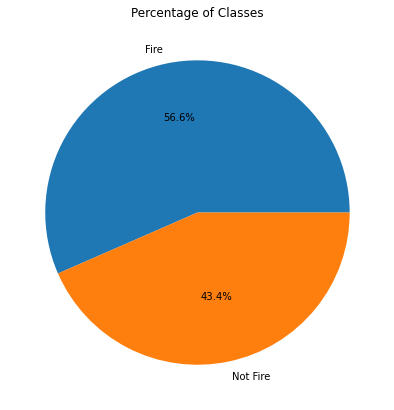

In [22]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
classeslabels = ["Fire", "Not Fire"]
fig = plt.figure(figsize =(10, 7))
plt.pie(classes,autopct = lambda pct: func(pct, classes),labels = classeslabels)  
plt.title ("Percentage of Classes")
plt.show() 

Because the percentage of both classes are close there will be no bias and because there is only two output there will be no variance

In [23]:
newdf_rain = newdf.loc[newdf.Rain >= 1]
newdf_rain
classes_r=newdf_rain['Classes'].value_counts()
print(classes_r)

0.0    41
1.0     2
Name: Classes, dtype: int64


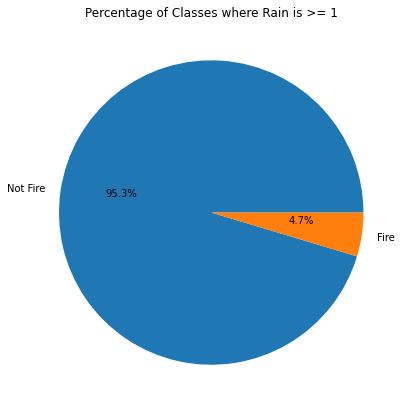

In [24]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
classeslabels = ["Not Fire", "Fire"]
fig = plt.figure(figsize =(10, 7))
plt.pie(classes_r,autopct = lambda pct: func(pct, classes_r),labels = classeslabels)  
plt.title ("Percentage of Classes where Rain is >= 1")
plt.show() 

In [25]:
newdf_ffmc = newdf.loc[newdf.FFMC < 80]
newdf_ffmc
classes_ffmc=newdf_ffmc['Classes'].value_counts()
print(classes_ffmc)

0.0    99
Name: Classes, dtype: int64


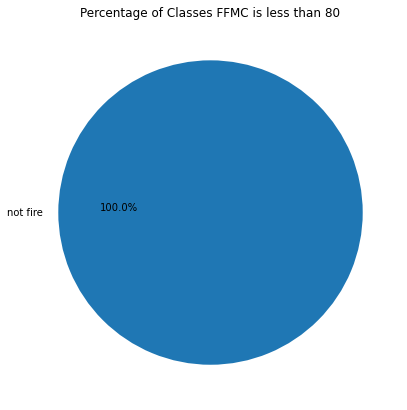

In [26]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n".format(pct, absolute)
classeslabels = ["not fire"]
fig = plt.figure(figsize =(10, 7))
plt.pie(classes_ffmc,autopct = lambda pct: func(pct, classes_ffmc),labels = classeslabels)  
plt.title ("Percentage of Classes FFMC is less than 80")
plt.show() 

Let's check for outliers

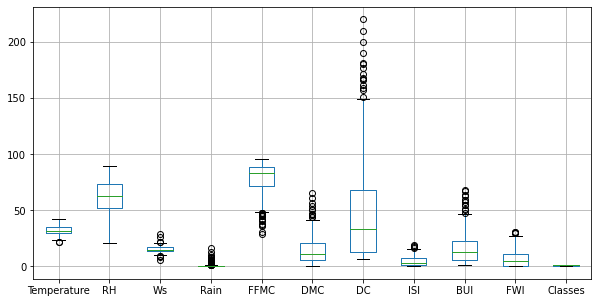

In [27]:
newdfo = newdf.drop(['day','month','year'],axis=1)
fig = plt.figure(figsize =(10, 5))
newdfo.boxplot()
plt.show()

Let's standardize the outliers 

In [28]:
scaler = StandardScaler()
scaler.fit(newdfo)
scaled_df = scaler.transform(newdfo)
scaled_df

array([[-0.87473544, -0.33247844,  0.88999047, ..., -0.93655635,
        -0.88345707, -1.14100254],
       [-0.87473544, -0.0631847 , -0.89291326, ..., -0.9012768 ,
        -0.89694665, -1.14100254],
       [-1.70200461,  1.35060746,  2.31631345, ..., -0.98594772,
        -0.9374154 , -1.14100254],
       ...,
       [-1.42624822,  1.68722464,  4.81237868, ..., -0.93655635,
        -0.92392582, -1.14100254],
       [-2.25351739, -0.53444875,  0.88999047, ..., -0.81660589,
        -0.85647791, -1.14100254],
       [-2.25351739,  0.13878561, -0.17975177, ..., -0.83777362,
        -0.88345707, -1.14100254]])

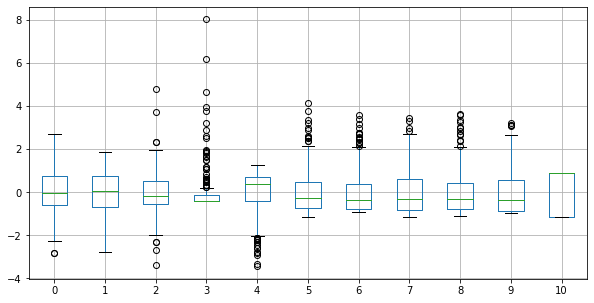

In [29]:
fig = plt.figure(figsize =(10, 5))
scaled_df=pd.DataFrame(scaled_df)
scaled_df.boxplot()
plt.show()

0='Temperature', 1='RH', 2='Ws', 3='Rain', 4='FFMC',5='DMC', 6='DC', 7='ISI', 8='BUI', 9='FWI', 10='Classes'

# Using KNN method to classify the data 

Splitting the data and standardizing it


In [30]:
X = newdf.drop(['Classes'],axis=1)
y = newdf["Classes"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

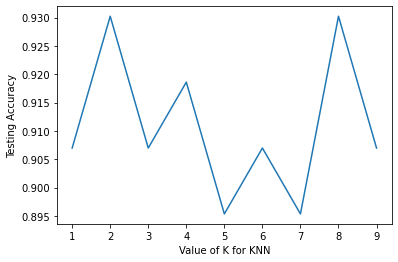

In [31]:
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

Using this graph we find out that the best value of K for the KNN is 8 we did ignored 2 cause it causes a lot of problems you see us trying 2 later

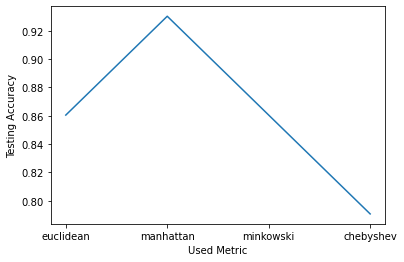

In [32]:
k_Metric = ['euclidean','manhattan','minkowski','chebyshev']
scores = []
for k in k_Metric:
    knn = KNeighborsClassifier(n_neighbors=8,metric=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_Metric, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()

Using this graph we find out that the best metric to use is manhattan

In [33]:
knn = KNeighborsClassifier(n_neighbors=8, metric='manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=8)

In [34]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))
knn8_test=knn.score(X_test, y_test)

Accuracy on training set: 0.937
Accuracy on test set: 0.930


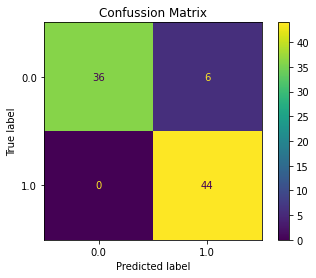

In [35]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

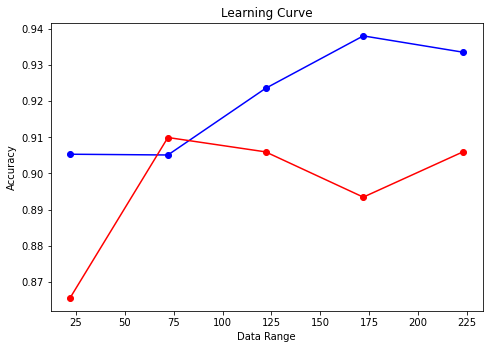

In [36]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(knn, X, y,cv=12,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [37]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['not fire','fire']))

              precision    recall  f1-score   support

    not fire       1.00      0.86      0.92        42
        fire       0.88      1.00      0.94        44

    accuracy                           0.93        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.93      0.93        86



In [38]:
mse, bias, var = bias_variance_decomp(knn,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)

In [39]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.092
Bias: 0.060
Variance: 0.032


Trying 2 as a K value

In [40]:
X = newdf.drop(['Classes'],axis=1)
y = newdf["Classes"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

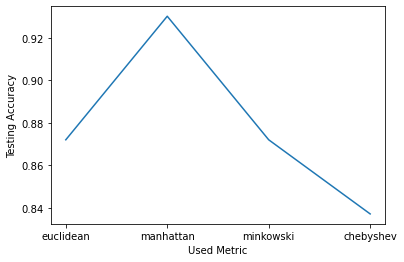

In [41]:
k_Metric = ['euclidean','manhattan','minkowski','chebyshev']
scores = []
for k in k_Metric:
    knn1 = KNeighborsClassifier(n_neighbors=2,metric=k)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(k_Metric, scores)
plt.xlabel('Used Metric')
plt.ylabel('Testing Accuracy')
plt.show()

In [42]:
knn1 = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=2)

In [43]:
print("Accuracy on training set: {:.3f}".format(knn1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn1.score(X_test, y_test)))
knn2_test=knn1.score(X_test, y_test)

Accuracy on training set: 0.956
Accuracy on test set: 0.930


using 8 as a value of K has brought to us a 0.7% difference between the training and testing, but using 2 as a value of K has brought to us an 2.6% difference.

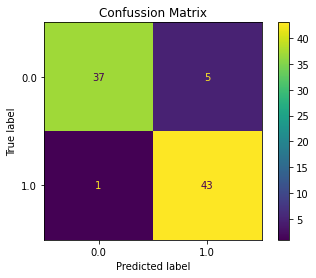

In [44]:
plot_confusion_matrix(knn1, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

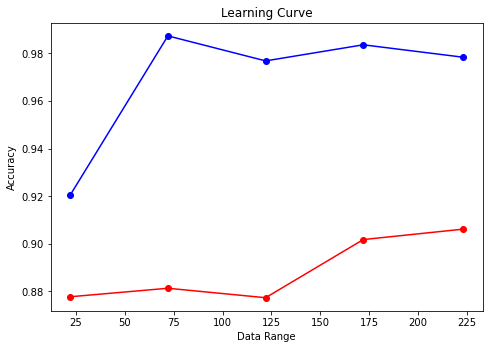

In [45]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(knn1, X, y,cv=12,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [46]:
y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['not fire','fire']))

              precision    recall  f1-score   support

    not fire       0.97      0.88      0.93        42
        fire       0.90      0.98      0.93        44

    accuracy                           0.93        86
   macro avg       0.93      0.93      0.93        86
weighted avg       0.93      0.93      0.93        86



In [47]:
mse, bias, var = bias_variance_decomp(knn1,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)

In [48]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.086
Bias: 0.059
Variance: 0.027


# Using Decision Tree Classifier method to classify the data 

In [49]:
X = newdf.drop(['Classes'],axis=1)
y = newdf["Classes"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

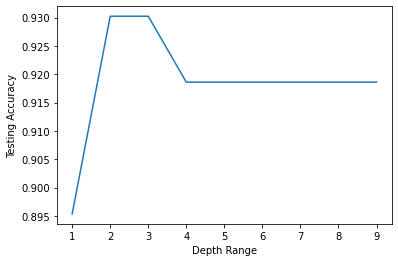

In [50]:
depth_range = range(1, 10)
scores = []
for d in depth_range:
    treecf = DecisionTreeClassifier(random_state=1,max_depth=d)
    treecf.fit(X_train, y_train)
    y_pred = treecf.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(depth_range, scores)
plt.xlabel('Depth Range')
plt.ylabel('Testing Accuracy')
plt.show()

By using this graph we find out that the best depth method will be 3

In [51]:
treecf = DecisionTreeClassifier(random_state=1,max_depth= 3)
treecf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [52]:
y_pred = treecf.predict(X_test)

In [53]:
treecf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.005083  ,
       0.        , 0.        , 0.96892545, 0.        , 0.        ,
       0.02599155, 0.        , 0.        ])

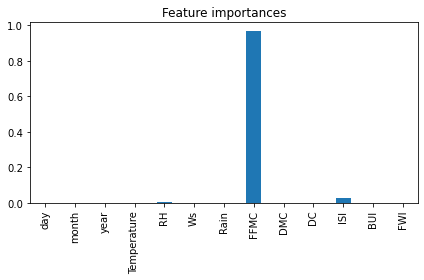

In [54]:
feature_names = [f"{i}" for i in X.columns]
forest_importances = pd.Series(treecf.feature_importances_, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar( ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

After revising the dataset, I have found out why the feature importance gave too much credit to the FFMC. I discovered that most of the fire events happened when the FFMC score exceeded the value of 80. The FFMC is The Fine Fuel Moisture Code that represents fuel moisture of forest litter fuels under the shade of a forest canopy. 

In [55]:
print("Accuracy on training set: {:.3f}".format(treecf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(treecf.score(X_test, y_test)))
treecf_test=treecf.score(X_test, y_test)

Accuracy on training set: 0.994
Accuracy on test set: 0.930


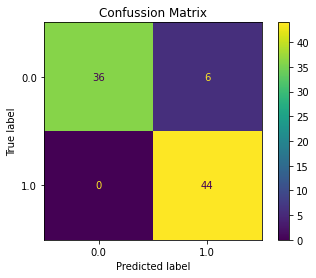

In [56]:
plot_confusion_matrix(treecf, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

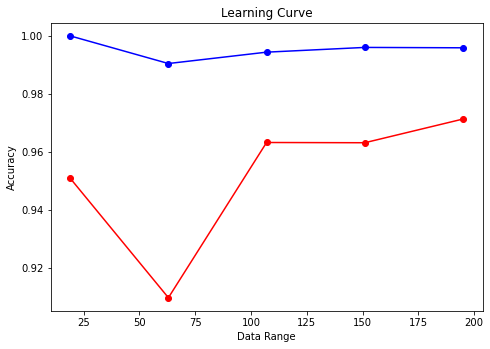

In [57]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(treecf, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [58]:
print(classification_report(y_test, y_pred, target_names=['not fire','fire']))

              precision    recall  f1-score   support

    not fire       1.00      0.86      0.92        42
        fire       0.88      1.00      0.94        44

    accuracy                           0.93        86
   macro avg       0.94      0.93      0.93        86
weighted avg       0.94      0.93      0.93        86



In [59]:
mse, bias, var = bias_variance_decomp(treecf,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)

In [60]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.082
Bias: 0.063
Variance: 0.019


 # Using Logistic regression method to classify the data 

In [61]:
X = newdf.drop(['Classes'],axis=1)
y = newdf["Classes"]
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

ss=preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

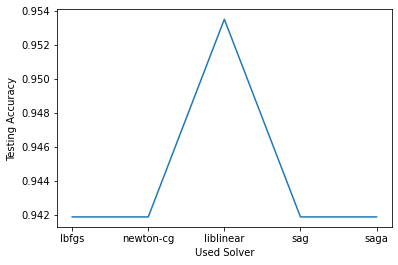

In [62]:
lr_solver = ['lbfgs','newton-cg','liblinear','sag','saga']
scores = []
for l in lr_solver:
    lr = LogisticRegression(random_state=1,solver=l, max_iter=10000)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
plt.plot(lr_solver, scores)
plt.xlabel('Used Solver')
plt.ylabel('Testing Accuracy')
plt.show()

By using this graph we find out that the liblinear is the best solver to use

In [63]:
lr = LogisticRegression(random_state=1,solver='liblinear', max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=1, solver='liblinear')

In [64]:
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))
lr_test=lr.score(X_test, y_test)

Accuracy on training set: 0.968
Accuracy on test set: 0.953


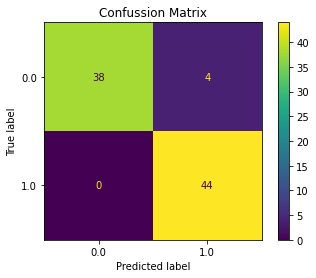

In [65]:
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

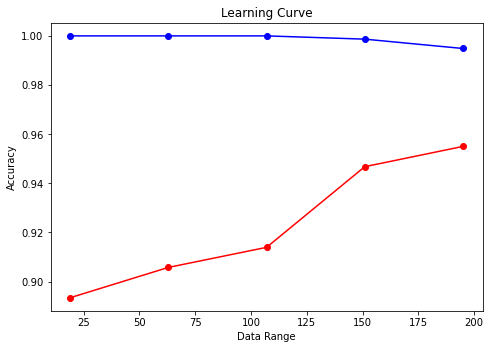

In [66]:
train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(lr, X, y,)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b')
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r')
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.show()

In [67]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['not fire','fire']))

              precision    recall  f1-score   support

    not fire       1.00      0.90      0.95        42
        fire       0.92      1.00      0.96        44

    accuracy                           0.95        86
   macro avg       0.96      0.95      0.95        86
weighted avg       0.96      0.95      0.95        86



In [68]:
mse, bias, var = bias_variance_decomp(lr,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)

In [69]:
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 0.069
Bias: 0.043
Variance: 0.027


# Comparison between models

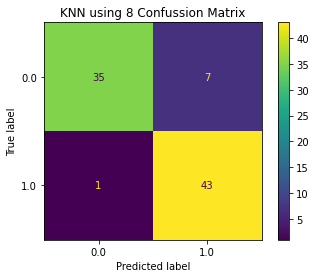

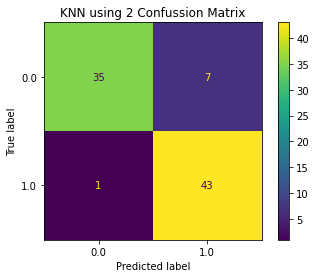

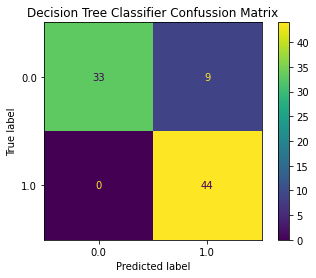

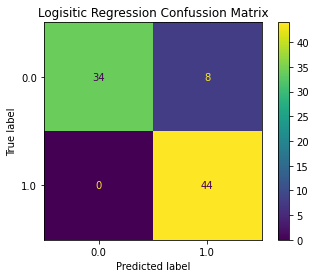

In [70]:
plot_confusion_matrix(knn, X_test, y_test)  
plt.title('KNN using 8 Confussion Matrix')
plot_confusion_matrix(knn1, X_test, y_test)  
plt.title('KNN using 2 Confussion Matrix')
plot_confusion_matrix(treecf, X_test, y_test)  
plt.title('Decision Tree Classifier Confussion Matrix')
plot_confusion_matrix(lr, X_test, y_test)  
plt.title('Logisitic Regression Confussion Matrix')
plt.show()

In [71]:
print("KNN 8 Accuracy on test set: ",knn8_test)
print("KNN 2 Accuracy on test set: ",knn2_test)
print("Decision Tree Accuracy on test set: ",treecf_test)
print("Logistic Regression Accuracy on test set: ",lr_test)

KNN 8 Accuracy on test set:  0.9302325581395349
KNN 2 Accuracy on test set:  0.9302325581395349
Decision Tree Accuracy on test set:  0.9302325581395349
Logistic Regression Accuracy on test set:  0.9534883720930233


We could see that the KNN method using 8 or 2 and the decision tree method all reached the testing accuracy of ~93%

But the Logistic Regression had the best results of all method of reaching a testing accuracy of ~95.3%

In [72]:
mse, bias, var = bias_variance_decomp(knn,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('KNN using 8 as Nearest Neighbour report')
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
mse, bias, var = bias_variance_decomp(knn1,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('\nKNN using 2 as Nearest Neighbour report')
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
mse, bias, var = bias_variance_decomp(treecf,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('\nDecision Tree report')
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)
mse, bias, var = bias_variance_decomp(lr,  X_train, y_train.values, X_test, y_test.values, loss='mse', num_rounds=20, random_seed=1)
print('\nLogistic Regression report')
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

KNN using 8 as Nearest Neighbour report
MSE: 0.092
Bias: 0.060
Variance: 0.032

KNN using 2 as Nearest Neighbour report
MSE: 0.086
Bias: 0.059
Variance: 0.027

Decision Tree report
MSE: 0.082
Bias: 0.063
Variance: 0.019

Logistic Regression report
MSE: 0.069
Bias: 0.043
Variance: 0.027


In [73]:
 pip install plotly==5.4.0

Note: you may need to restart the kernel to use updated packages.
